###Import necessary libraries

In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

#Validation section of tutorial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.8 MB/s eta 0:00:00


###Load the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving Datathon #3 Dataset - HAD7001.csv to Datathon #3 Dataset - HAD7001.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Datathon #3 Dataset - HAD7001.csv']))
pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

### Cleaning the Data

In [ ]:
#No duplicates
duplicates = df[df.duplicated(subset=['patient_id'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [encounter_id, patient_id, hospital_id, hospital_death, age, bmi, elective_surgery, ethnicity, gender, height, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, readmission_status, weight, albumin_apache, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, bilirubin_apache, bun_apache, creatinine_apache, fio2_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, glucose_apache, heart_rate_apache, hematocrit_apache, intubated_apache, map_apache, paco2_apache, paco2_for_ph_apache, pao2_apache, ph_apache, resprate_apache, sodium_apache, temp_apache, urineoutput_apache, ventilated_apache, wbc_apache, d1_diasbp_invasive_max, d1_diasbp_invasive_min, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_m

In [ ]:
# drop all not demogrpahic vars [1:18], remove height and weight, hospital_admit_source, icu_admit_source,
#icu_id, icu_stay_type
df = df.iloc[:, 1:19]
df = df.drop(columns=['height', 'weight', 'hospital_admit_source', 'icu_stay_type', 'icu_id', 'icu_stay_type'])
print(df)

       patient_id  hospital_id  hospital_death   age        bmi  \
0           25312          118               0  68.0  22.730000   
1           59342           81               0  77.0  27.420000   
2           50777          118               0  25.0  31.950000   
3           46918          118               0  81.0  22.640000   
4           34377           33               0  19.0        NaN   
...           ...          ...             ...   ...        ...   
91708       78108           30               0  75.0  23.060250   
91709       13486          121               0  56.0  47.179671   
91710       58179          195               0  48.0  27.236914   
91711      120598           66               0   NaN  23.297481   
91712       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender           icu_admit_source  \
0                     0  Caucasian      M                      Floor   
1                     0  Caucasian      F          

Categorical data cleaning

In [ ]:
#ethnicity
ethnicity_mapping = {
    'Caucasian': 1,
    'Hispanic': 2,
    'Asian': 3,
    'African American': 4,
    'Native American': 5
}
df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)
df['ethnicity'] = df['ethnicity'].fillna(6).astype(int)

#gender
df['gender'] = df['gender'].map({'M': 1, 'F': 2})
df = df.dropna(subset=['gender'])
df['gender'] = df['gender'].astype(int)

#icu_admit_source
icu_admit_mapping = {
    'Floor': 1,
    'Accident & Emergency': 2,
    'Operating Room / Recovery': 3,
    'Other Hospital': 4,
    'Other ICU': 5
}
df['icu_admit_source'] = df['icu_admit_source'].map(icu_admit_mapping)
df['icu_admit_source'] = df['icu_admit_source'].fillna(6).astype(int)

#icu_type
icu_type_mapping = {
    'CTICU': 1,
    'Med-Surg ICU': 2,
    'CCU-CTICU': 3,
    'Neuro ICU': 4,
    'MICU': 5,
    'SICU': 6
}
df['icu_type'] = df['icu_type'].map(icu_type_mapping)
df['icu_type'] = df['icu_type'].fillna(6).astype(int)

In [ ]:
#Categorical Data
# check sparsity with tables, counts and percentages
hospital_death_count = df['hospital_death'].value_counts()
hospital_death_per = (df['hospital_death'].value_counts(normalize=True) * 100).round(2)
hospital_death_table = pd.DataFrame({
    'Count': hospital_death_count,
    'Percentage': hospital_death_per
})
print(hospital_death_table)

elective_surgery_count = df['elective_surgery'].value_counts()
elective_surgery_per = (df['elective_surgery'].value_counts(normalize=True) * 100).round(2)
elective_surgery_table = pd.DataFrame({
    'Count': elective_surgery_count,
    'Percentage': elective_surgery_per
})
print(elective_surgery_table)

ethnicity_count = df['ethnicity'].value_counts()
ethnicity_per = (df['ethnicity'].value_counts(normalize=True) * 100).round(2)
ethnicity_table = pd.DataFrame({
    'Count': ethnicity_count,
    'Percentage': ethnicity_per
})
print(ethnicity_table)

gender_count = df['gender'].value_counts()
gender_per = (df['gender'].value_counts(normalize=True) * 100).round(2)
gender_table = pd.DataFrame({
    'Count': gender_count,
    'Percentage': gender_per
})
print(gender_table)

icu_admit_source_count = df['icu_admit_source'].value_counts()
icu_admit_source_per = (df['icu_admit_source'].value_counts(normalize=True) * 100).round(2)
icu_admit_source_table = pd.DataFrame({
    'Count': icu_admit_source_count,
    'Percentage': icu_admit_source_per
})
print(icu_admit_source_table)

icu_type_count = df['icu_type'].value_counts()
icu_type_per = (df['icu_type'].value_counts(normalize=True) * 100).round(2)
icu_type_table = pd.DataFrame({
    'Count': icu_type_count,
    'Percentage': icu_type_per
})
print(icu_type_table)

readmission_status_count = df['readmission_status'].value_counts()
readmission_status_per = (df['readmission_status'].value_counts(normalize=True) * 100).round(2)
readmission_status_table = pd.DataFrame({
    'Count': readmission_status_count,
    'Percentage': readmission_status_per
})
print(readmission_status_table)


                Count  Percentage
hospital_death                   
0               83781       91.38
1                7907        8.62
                  Count  Percentage
elective_surgery                   
0                 74837       81.62
1                 16851       18.38
           Count  Percentage
ethnicity                   
1          70682       77.09
4           9545       10.41
6           5749        6.27
2           3795        4.14
3           1129        1.23
5            788        0.86
        Count  Percentage
gender                   
1       49469       53.95
2       42219       46.05
                  Count  Percentage
icu_admit_source                   
2                 54035       58.93
3                 18713       20.41
1                 15611       17.03
4                  2358        2.57
5                   859        0.94
6                   112        0.12
          Count  Percentage
icu_type                   
2         50565       55.15
6         14

In [ ]:
#Drop readmission since there's no variability
df = df.drop(columns=['readmission_status'])
print(df)

       patient_id  hospital_id  hospital_death   age        bmi  \
0           25312          118               0  68.0  22.730000   
1           59342           81               0  77.0  27.420000   
2           50777          118               0  25.0  31.950000   
3           46918          118               0  81.0  22.640000   
4           34377           33               0  19.0        NaN   
...           ...          ...             ...   ...        ...   
91708       78108           30               0  75.0  23.060250   
91709       13486          121               0  56.0  47.179671   
91710       58179          195               0  48.0  27.236914   
91711      120598           66               0   NaN  23.297481   
91712       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity  gender  icu_admit_source  icu_type  \
0                     0          1       1                 1         1   
1                     0          1       2     


Mean and Standard Deviation for Continuous Variables:
        age    bmi  pre_icu_los_days
mean  62.34  29.86              0.85
std   16.75   8.31              2.52


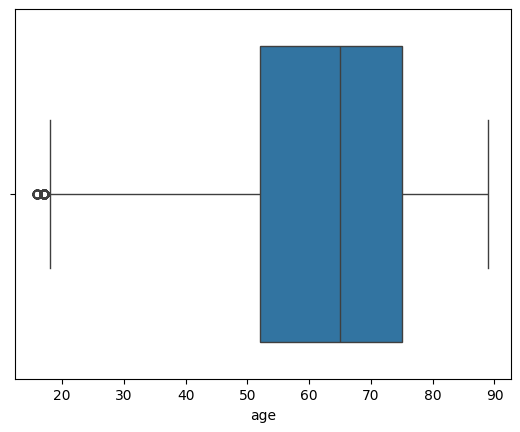

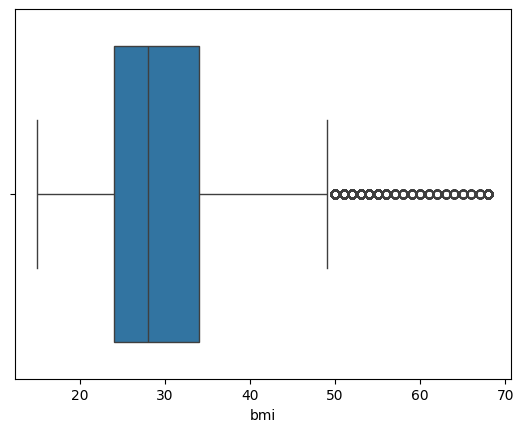

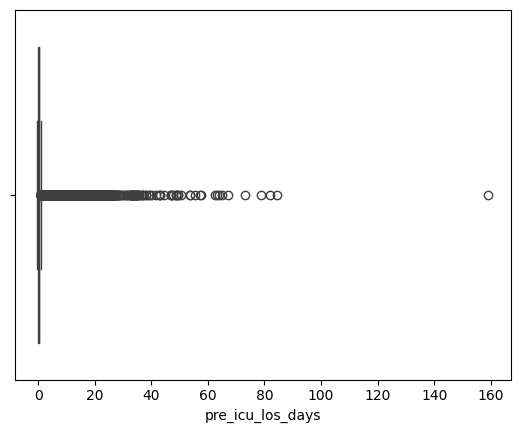

In [ ]:
#Continuous:
#Change bmi to int and round
df['bmi'] = df['bmi'].fillna(999)
df['bmi'] = np.ceil(df['bmi']).astype(int)
df = df[df['bmi'] != 999]

#drop any patients that have age missing
df = df.dropna(subset=['age'])

# print means and SD, box plots
continuous_vars = ['age', 'bmi', 'pre_icu_los_days']
mean_sd = df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)

sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['pre_icu_los_days'])
plt.show()


Mean and Standard Deviation for Continuous Variables:
        age    bmi  pre_icu_los_days
mean  61.99  28.99              0.16
std   16.91   6.71              0.19


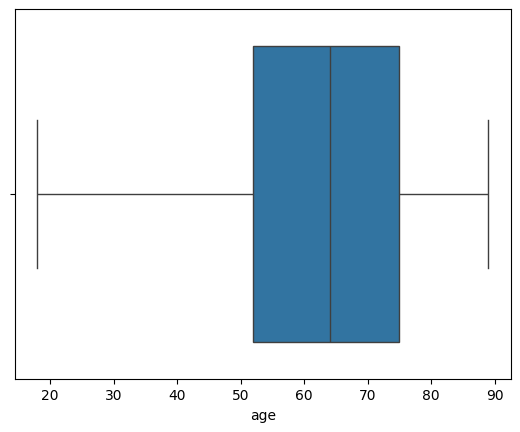

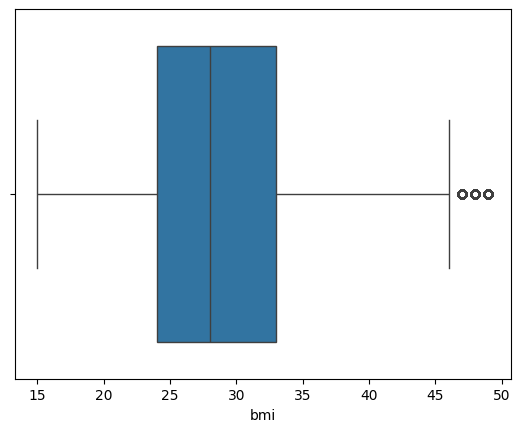

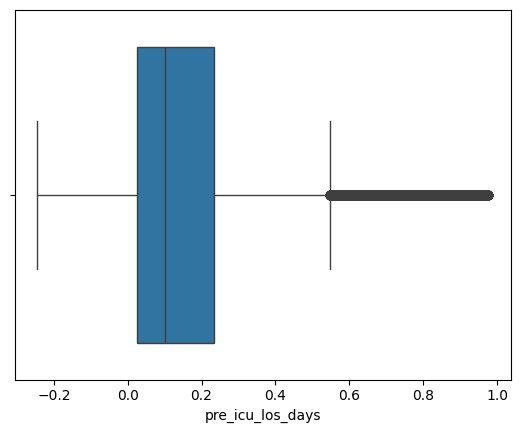

In [ ]:
# Calculate the IQR for each variable and drop outliers
for var in continuous_vars:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop rows outside the IQR bounds
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

continuous_vars = ['age', 'bmi', 'pre_icu_los_days']
mean_sd = df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)

sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['pre_icu_los_days'])
plt.show()

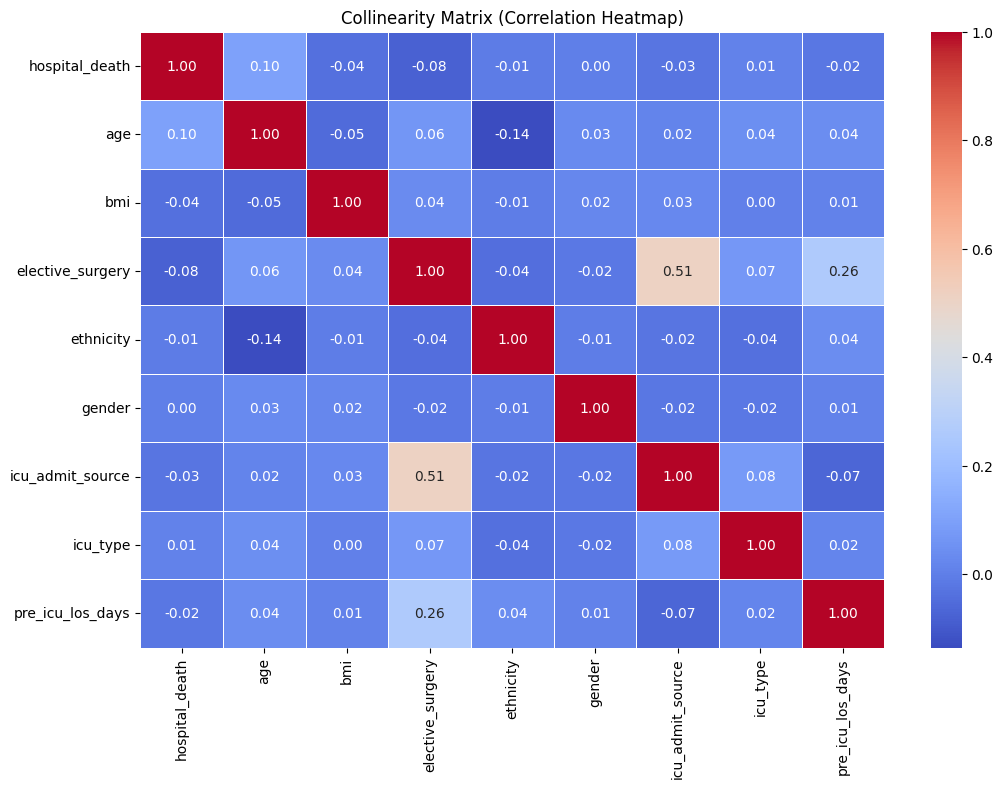

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

In [ ]:
df = df.drop(['albumin_apache', 'hospital_id', 'patient_id'], axis=1)
print(df)

       hospital_death   age  bmi  elective_surgery  ethnicity  gender  \
0                   0  68.0   23                 0          1       1   
1                   0  77.0   28                 0          1       2   
2                   0  25.0   32                 0          1       2   
3                   0  81.0   23                 1          1       2   
5                   0  67.0   28                 0          1       1   
...               ...   ...  ...               ...        ...     ...   
91706               0  54.0   20                 0          5       1   
91708               0  75.0   24                 0          1       1   
91709               0  56.0   48                 0          1       2   
91710               0  48.0   28                 0          1       1   
91712               0  82.0   23                 1          1       2   

       icu_admit_source  icu_type  pre_icu_los_days  
0                     1         1          0.541667  
1              

###Explore the data

In [ ]:
#2.1
print("\n===== Dataset Overview =====")
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nUnique Values in Each Column:\n", df.nunique())


===== Dataset Overview =====
Shape of the dataset: (28380, 9)

Data Types:
 hospital_death        int64
age                 float64
bmi                   int64
elective_surgery      int64
ethnicity             int64
gender                int64
icu_admit_source      int64
icu_type              int64
pre_icu_los_days    float64
dtype: object

Summary Statistics:
        hospital_death           age           bmi  elective_surgery  \
count    28380.000000  28380.000000  28380.000000      28380.000000   
mean         0.098696     61.461628     28.852995          0.108598   
std          0.298259     16.951717      6.746221          0.311139   
min          0.000000     18.000000     15.000000          0.000000   
25%          0.000000     51.000000     24.000000          0.000000   
50%          0.000000     64.000000     28.000000          0.000000   
75%          0.000000     75.000000     33.000000          0.000000   
max          1.000000     89.000000     49.000000          1.000000

In [ ]:
column_counts = ['hospital_death', 'elective_surgery', 'ethnicity', 'icu_admit_source', 'icu_type']

for col in column_counts:
  print(f"Value counts")
  print(df[col].value_counts())
  print("\n")


Value counts
hospital_death
0    25579
1     2801
Name: count, dtype: int64


Value counts
elective_surgery
0    25298
1     3082
Name: count, dtype: int64


Value counts
ethnicity
1    21636
4     2821
6     2036
2     1109
3      420
5      358
Name: count, dtype: int64


Value counts
icu_admit_source
2    20760
3     3644
1     2497
4     1267
5      194
6       18
Name: count, dtype: int64


Value counts
icu_type
2    16695
6     4303
5     2834
4     1989
3     1857
1      702
Name: count, dtype: int64




In [ ]:
#Look for missing data
missing_value_counts = df.isnull().sum()
missing_value_counts

#No missing data

,0
hospital_death,0
age,0
bmi,0
elective_surgery,0
ethnicity,0
gender,0
icu_admit_source,0
icu_type,0
pre_icu_los_days,0


In [ ]:
#Convert continuous values to the nearest integer
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].apply(lambda x: round(x))

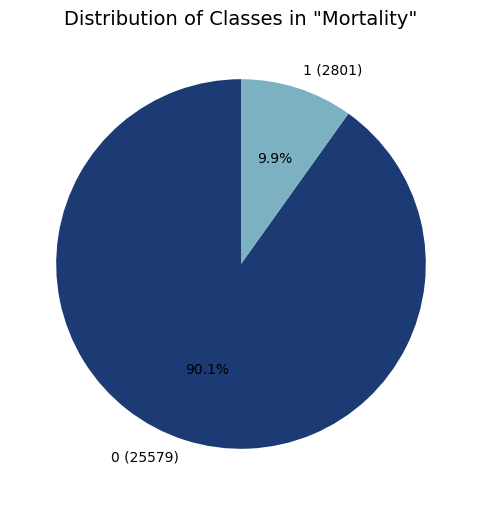

In [ ]:
#Compare class imbalance for the outcome
### Create a pie chart to show the distribution of categories in the 'Mortality' variable --------------
# Count occurrences of each class in our variable of interest
counts = df['hospital_death'].value_counts()

# Define colors
colors = ['#1c3a73', '#7cb1c2']

# Create pie chart
plt.figure(figsize=(6, 6)) #tuple for fig size, 6x6 inches
plt.pie(
    counts, #counts for each class
    labels=[f'{cls} ({count})' for cls, count in counts.items()],  # add labels with counts... counts.items() returns an iterable of tuples e.g., [('class', count)], which are then unpacked and formatted into labels
    autopct='%1.1f%%',  # Show percentages
    colors=colors,
    startangle=90
)

# Set title
plt.title('Distribution of Classes in "Mortality"', fontsize=14)

# Show plot
plt.show()

#Major class imbalance in mortality variable
#We may need to make sure we sample mortality cases appropriately

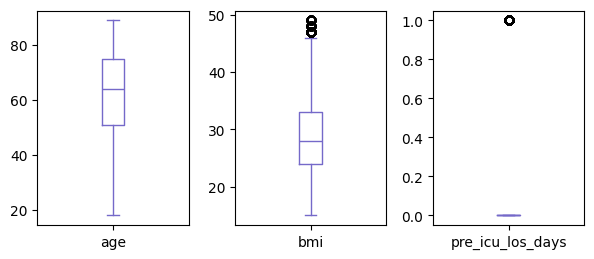

In [ ]:
description = df[['age', 'bmi', 'pre_icu_los_days']]

# Visual representation of df.describe()
description.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

#There are outliers but all are biologically plausible

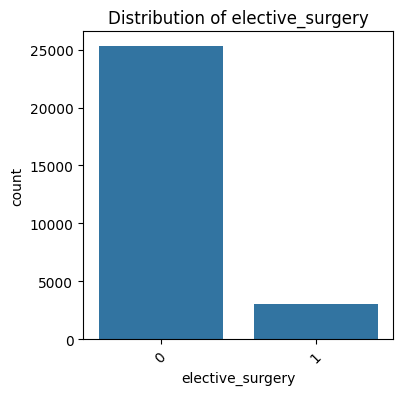

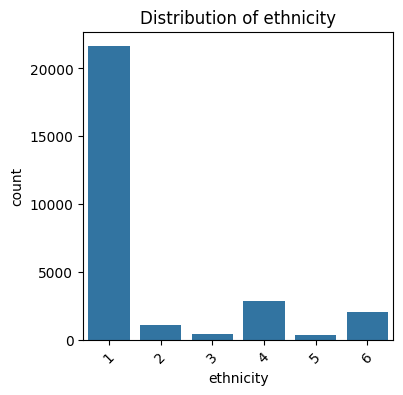

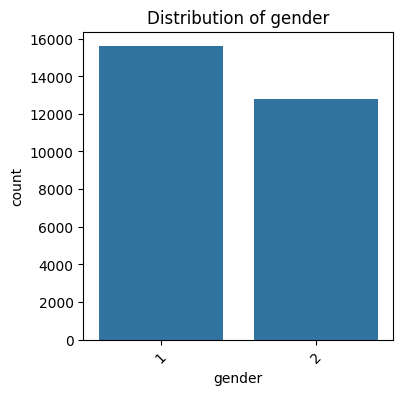

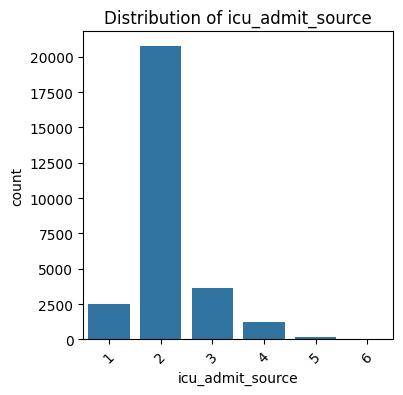

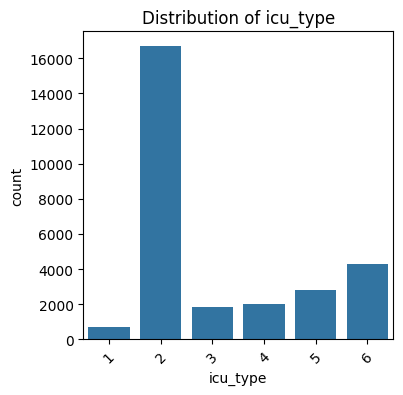

In [ ]:
categorical_columns = df[['elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_type']]
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotates labels if needed
    plt.show()

###Initialize the neural network parameters

In [ ]:
#Randomly sample 80% of the data for training
train_data = df.sample(1000, replace = False, random_state=42)
test_data = df.drop(train_data.index)
test_data = test_data.sample(1000, replace = False, random_state = 42)

#train_data = df.sample(frac=0.8, random_state=42)
#test_data = df.drop(train_data.index)

#Data preparation
#Extract the outcome for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

#Extract the features
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

#Standardized the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

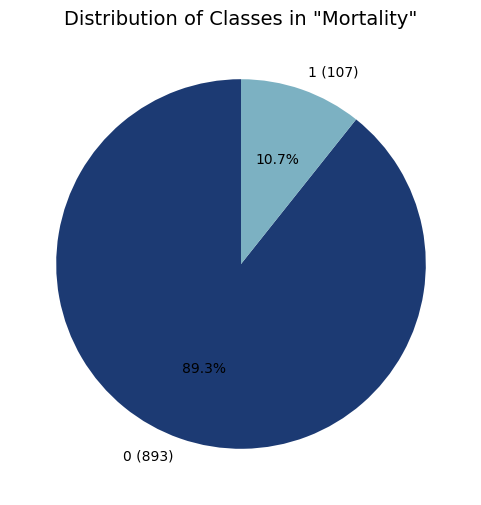

In [ ]:
#Compare class imbalance for the outcome
### Create a pie chart to show the distribution of categories in the 'Mortality' variable --------------
# Count occurrences of each class in our variable of interest
counts = train_data['hospital_death'].value_counts()

# Define colors
colors = ['#1c3a73', '#7cb1c2']

# Create pie chart
plt.figure(figsize=(6, 6)) #tuple for fig size, 6x6 inches
plt.pie(
    counts, #counts for each class
    labels=[f'{cls} ({count})' for cls, count in counts.items()],  # add labels with counts... counts.items() returns an iterable of tuples e.g., [('class', count)], which are then unpacked and formatted into labels
    autopct='%1.1f%%',  # Show percentages
    colors=colors,
    startangle=90
)
# Set title
plt.title('Distribution of Classes in "Mortality"', fontsize=14)
# Show plot
plt.show()

#Major class imbalance in mortality variable
#We may need to make sure we sample mortality cases appropriately

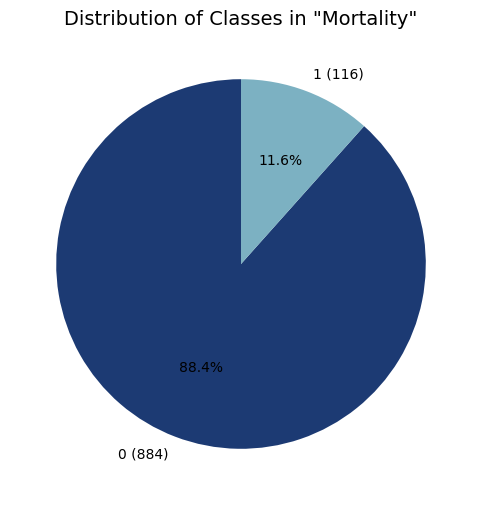

In [ ]:
#Compare class imbalance for the outcome
### Create a pie chart to show the distribution of categories in the 'Mortality' variable --------------
# Count occurrences of each class in our variable of interest
counts = test_data['hospital_death'].value_counts()

# Define colors
colors = ['#1c3a73', '#7cb1c2']

# Create pie chart
plt.figure(figsize=(6, 6)) #tuple for fig size, 6x6 inches
plt.pie(
    counts, #counts for each class
    labels=[f'{cls} ({count})' for cls, count in counts.items()],  # add labels with counts... counts.items() returns an iterable of tuples e.g., [('class', count)], which are then unpacked and formatted into labels
    autopct='%1.1f%%',  # Show percentages
    colors=colors,
    startangle=90
)
# Set title
plt.title('Distribution of Classes in "Mortality"', fontsize=14)
# Show plot
plt.show()

#Major class imbalance in mortality variable
#We may need to make sure we sample mortality cases appropriately

###Regularized training

In [ ]:
import torch.nn as nn

# Define hyperparameters
number_of_input_features = X_train.shape[1]
number_of_hidden_units = 10
epochs = 100
learning_rate = 0.00000001
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probability = 0.6

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),  # Added a linear layer to reduce output to 1 unit
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 100 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 1/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 2/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 3/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 4/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 5/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 6/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 7/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 8/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 9/100 ---> Train Accuracy: 0.5379999876022339, Validation Accuracy: 0.5350000262260437
Epoch 10/100 ---> Train Accuracy: 0.5379999876022339, Validation Accur

###Optimization pipeline

In [ ]:
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split

categorical_columns = ['elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_type']
continuous_columns = ['age', 'bmi', 'pre_icu_los_days']

ct = ColumnTransformer(
    [
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

In [ ]:
model2 = Pipeline(steps = [
    ('preprocess', ct),
    ('model', model)
])

In [ ]:
import subprocess

# Installation on Google Colab
try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch' , 'torch'])
except ImportError:
    pass

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

input_features = X_train.shape[1]
number_of_hidden_units = 10
dropout_probability = 0.6

# PyTorch classifier
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(input_features, number_of_hidden_units)
        self.act = nn.Tanh()
        self.dropout = nn.Dropout(dropout_probability)
        self.output = nn.Linear(number_of_hidden_units, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    Model,
    criterion=nn.BCELoss,
    max_epochs = 100,
    batch_size = 10,
    verbose=False
)

In [ ]:
# define the grid search parameters
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32).reshape(-1, 1)  # Reshape Y_train to (n_samples, 1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],
    'optimizer__lr': [0.000001, 0.0001, 0.001]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_result = grid.fit(X_train, Y_train)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Best: 0.907800 using {'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.0001, 'optimizer__momentum': 0.9}

Best: 0.900000 using {'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.001}
0.619000 (0.258291) with: {'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 1e-06}
0.841000 (0.063356) with: {'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.0001}
0.900000 (0.000000) with: {'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.001}
0.474000 (0.193582) with: {'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer__lr': 1e-06}
0.900000 (0.000000) with: {'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer__lr': 0.0001}
0.899000 (0.002000) with: {'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer__lr': 0.001}
0.584000 (0.219440) with: {'optimizer': <class 'torch.optim.adagrad.Adagrad'>, 'optimizer__lr': 1e-06}
0.788000 (0.104623) with: {'optimizer': <class 'torch.optim.adagrad.Adagrad'>, 'optimizer__lr': 0.0001}
0.823000 (0.144035) with: {'optimizer': <class 'torch.optim.adagrad.Adagrad'>, 'optimizer__lr': 0.001}
0.41

In [ ]:
X_test = t.tensor(X_test, dtype = t.float32)

Test Accuracy with best hyperparameters: 0.885
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       885
           1       0.00      0.00      0.00       115

    accuracy                           0.89      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.89      0.83      1000


Confusion Matrix for Best Model (20% Test Size):
[[885   0]
 [115   0]]


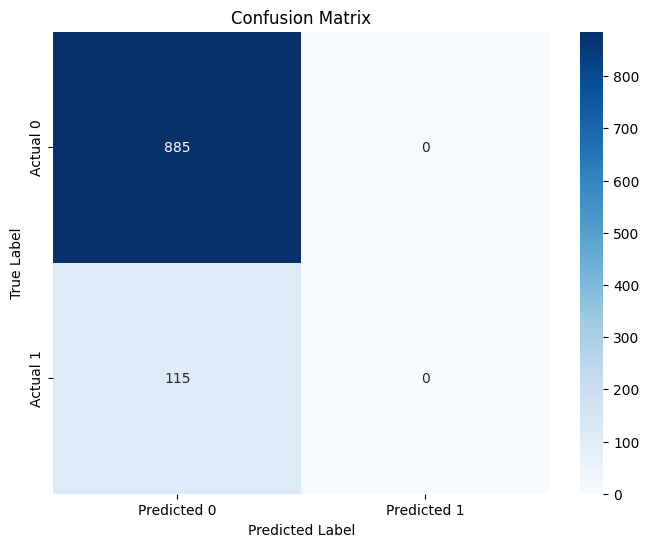

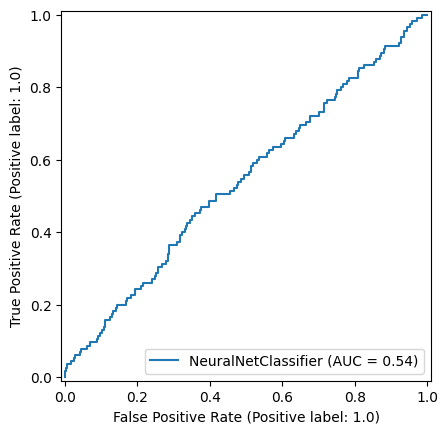

In [ ]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test)


accuracy1 = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy with best hyperparameters: {accuracy1}")

#Further evaluation metrics:
print(classification_report(Y_test,Y_pred))

#Visualize confusion matrix:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix for Best Model (20% Test Size):")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Generate ROC curve
RocCurveDisplay.from_estimator(best_model, X_test, Y_test)
plt.show()

#Might be a sampling issue for 1 events

###View the loss function characteristics using the optimal parameters

In [ ]:
#Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 10
hidden_units_layer_2 = 10

input_features = X_train.shape[1]

#First layer: define weights and biases
W1 = t.randn((input_features, hidden_units_layer_1), requires_grad = True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad = True)

#Second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad = True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad = True)

#Output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad = True)
B3 = t.zeros((1, 1), requires_grad = True)

In [ ]:
from torch.optim import SGD

# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

#Create loss function diagrams for the testing and validation sets
# Define training hyperparameters based on the optimal parameters defined above
epochs = 1000
learning_rate = 0.001
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = SGD([W1, B1, W2, B2, W3, B3, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
#Define the forward pass of the neural network
def forward(input):
  #First hidden layer with linear activation
  out = t.nn.functional.linear(input, weight = W1.t(), bias = B1)
  #Second hidden layer with tanh activation
  out = tanh(out @ W2 + B2)
  #Third hidden layer with drop out
  out = t.nn.functional.dropout(out, p = dropout_probability)
  #Output layer with sigmoid activation
  out = sigmoid(out @ W3 + B3)
  return out

In [ ]:
train_loss_list = []
# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y.view(-1))

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

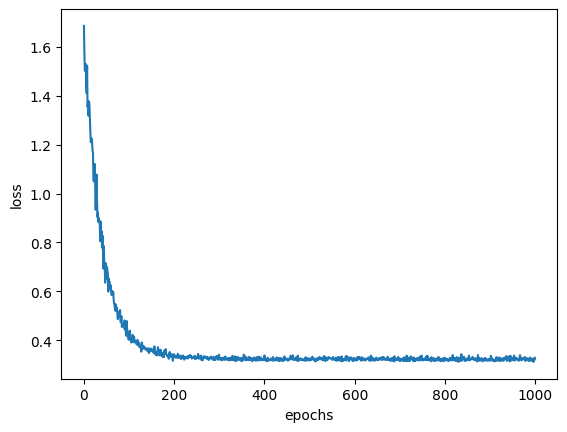

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

#It seems there is either a lot of noise or the model is not able to learn the data

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y.view(-1))  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

    #This does not suggest evidence of overfitting, linear input seems to bring both closer

0.3615369498729706
0.31865739822387695


In [ ]:
import torch.nn as nn

# Define hyperparameters
number_of_input_features = X_train.shape[1]
number_of_hidden_units = 10
epochs = 100
learning_rate = 0.001
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probability = 0.6

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),  # Added a linear layer to reduce output to 1 unit
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 100 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y.view(-1)) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.31439998745918274, Validation Accuracy: 0.3709999918937683
Epoch 1/100 ---> Train Accuracy: 0.3463999927043915, Validation Accuracy: 0.40700000524520874
Epoch 2/100 ---> Train Accuracy: 0.376800000667572, Validation Accuracy: 0.4320000112056732
Epoch 3/100 ---> Train Accuracy: 0.4032000005245209, Validation Accuracy: 0.460999995470047
Epoch 4/100 ---> Train Accuracy: 0.4343999922275543, Validation Accuracy: 0.492000013589859
Epoch 5/100 ---> Train Accuracy: 0.46720001101493835, Validation Accuracy: 0.5130000114440918
Epoch 6/100 ---> Train Accuracy: 0.4991999864578247, Validation Accuracy: 0.5379999876022339
Epoch 7/100 ---> Train Accuracy: 0.5224000215530396, Validation Accuracy: 0.5559999942779541
Epoch 8/100 ---> Train Accuracy: 0.5519999861717224, Validation Accuracy: 0.5839999914169312
Epoch 9/100 ---> Train Accuracy: 0.5735999941825867, Validation Accuracy: 0.593999981880188
Epoch 10/100 ---> Train Accuracy: 0.5952000021934509, Validation Accura

Text(0, 0.5, 'accuracy')

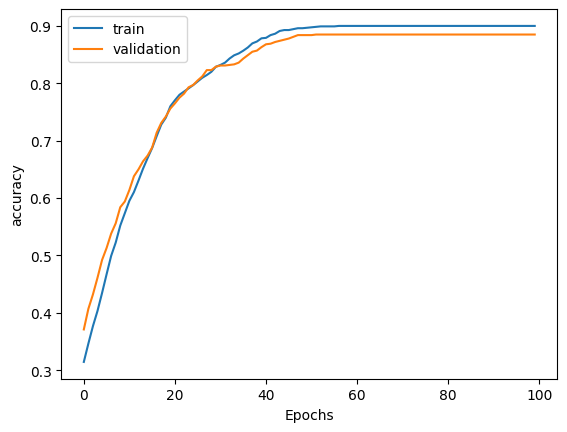

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('accuracy')

#It seems as though it hasnt not reached an optimal level even with a very low learning rate; may require more epochs?
#There isn't evidence of overfitting or the learning rate being too high
#The validation seems to better than the training data, which makes no sense